# Выбираем станцию метро и точки в радиусе 1км

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
df = pd.read_csv('converted.csv',sep=";", header=0, index_col="ID_STOP")

In [2]:
sub = df.loc[df['STOP_NAME'] == "Чернышевская"]

In [3]:
sub

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100113,Чернышевская,59.944575,30.359653


In [ ]:
df=df.drop(df.loc[df['STOP_NAME'] == "Чернышевская"].index, inplace=False)

In [10]:
column_names = ["STOP_NAME", "LATITUDE", "LONGITUDE"]
Filter_df =  pd.DataFrame(columns = column_names)

In [11]:
from geopy import distance
subway = (float(sub['LATITUDE']), float(sub['LONGITUDE']))
for index, stops in df.iterrows():
    point = (stops['LATITUDE'], stops['LONGITUDE'])
    if (distance.distance(subway, point).km) <= 1:
        Filter_df = Filter_df.append(df.loc[index])

# Кластеризуем методом Kmeans

## Пробные шаги

In [38]:
from sklearn.cluster import KMeans

model = KMeans(max_iter=200, n_clusters=5, random_state=42, tol=0.0001, verbose=0)

In [39]:
model.fit(Filter_df[['LATITUDE','LONGITUDE']])

KMeans(max_iter=200, n_clusters=5, random_state=42)

In [25]:
model.labels_

array([4, 2, 0, 0, 1, 3, 3, 1, 4, 0, 0, 0, 0, 2, 2, 0, 4, 0, 3, 0, 4, 0,
       0, 1, 1, 1, 4, 0, 0, 2, 1, 0, 0, 4, 4, 1, 1, 2, 2, 3, 1, 4, 2, 2,
       1, 0, 2], dtype=int32)

In [26]:
model.cluster_centers_

array([[59.94445911, 30.34808148],
       [59.94599224, 30.36781387],
       [59.93830139, 30.36193911],
       [59.94364359, 30.37522888],
       [59.94492113, 30.36000055]])

## Строим "локоть"

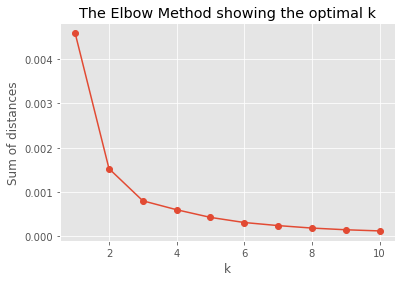

In [27]:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42).fit(Filter_df[['LATITUDE','LONGITUDE']]) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Проверка 3х кластеров

In [29]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [31]:
Filter_df.groupby('cluster').size()

cluster
0    17
1    16
2    14
dtype: int64

In [32]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map
map.save("map1.html")

In [33]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    elif(cluster == 2):
        return('orange')
    else:
        return('red')


In [36]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [37]:
map

## Проверка 2х кластеров

In [40]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [41]:
Filter_df.groupby('cluster').size()

cluster
0    16
1    31
dtype: int64

In [42]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map


In [43]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    else:
        return('orange')


In [44]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [45]:
map

## Проверка 4х кластеров

In [46]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [47]:
Filter_df.groupby('cluster').size()

cluster
0     9
1    16
2    14
3     8
dtype: int64

In [48]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map


In [49]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    elif(cluster == 2):
        return('orange')
    elif(cluster == 3):
        return('red')
    else:
        return('blue')

In [50]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [51]:
map

## Проверка 5 кластеров

In [52]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [53]:
Filter_df.groupby('cluster').size()

cluster
0    16
1    10
2     9
3     4
4     8
dtype: int64

In [54]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map


In [55]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    elif(cluster == 2):
        return('orange')
    elif(cluster == 3):
        return('red')
    elif(cluster == 4):
        return('blue')
    else:
        return('yellow')

In [56]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [57]:
map

## Проверка 6 кластеров

In [58]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [59]:
Filter_df.groupby('cluster').size()

cluster
0     9
1     8
2    10
3     8
4     8
5     4
dtype: int64

In [60]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map


In [61]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    elif(cluster == 2):
        return('orange')
    elif(cluster == 3):
        return('red')
    elif(cluster == 4):
        return('blue')
    elif(cluster == 5):
        return('white')
    else:
        return('yellow')

In [62]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [63]:
map